# 📝 Exercise M7.02

We **presented different classification metrics** in the previous notebook.
However, we **did not use it with a cross-validation**. This exercise aims at
practicing and implementing cross-validation.

We will reuse the **blood transfusion dataset**.

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [3]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [6]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create a decision tree classifier.

In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

Create a **`StratifiedKFold` cross-validation** object. Then use it inside the
**`cross_val_score`** function to evaluate the decision tree. We will first use
the **accuracy as a score function**. **Explicitly use the `scoring` parameter**
of `cross_val_score` to compute the accuracy (even if this is the default
score). Check its documentation to learn how to do that.

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold()
scores = cross_val_score(model, data, target, cv=cv, scoring='accuracy')

scores

array([0.42666667, 0.6       , 0.61333333, 0.70469799, 0.69127517])

Repeat the experiment by **computing the `balanced_accuracy`**.

In [4]:
scores = cross_val_score(model, data, target, cv=cv, scoring='balanced_accuracy')

scores

array([0.48026316, 0.4751462 , 0.41374269, 0.61892231, 0.50125313])

We now add a bit of complexity. We would like to **compute the precision**
of our model. However, during the course we saw that we need to mention the
**positive label** which in our case we consider to be the class **`donated`**.

We show that computing the precision without providing the positive
label will not be supported by scikit-learn because it is indeed ambiguous.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
try:
    scores = cross_val_score(tree, data, target, cv=10, scoring="precision")
except ValueError as exc:
    print(exc)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1656, in precision_score
    p, _, _, _ = precision_recall_fscore_support(y_true, y_pred,
  

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">We catch the exception with a <tt class="docutils literal">try</tt>/<tt class="docutils literal">except</tt> pattern to be able to print it.</p>
</div>

We get an exception because the **default scorer** has its **positive label set to
one (`pos_label=1`)**, which is not our case (**our positive label is "donated"**).
In this case, we need to **create a scorer** using the **scoring function** and the
**helper function `make_scorer`**.

So, **import `sklearn.metrics.make_scorer`** and
**`sklearn.metrics.precision_score`**. Check their documentations for more
information.
Finally, **create a scorer** by calling **`make_scorer`** using the **score function
`precision_score`** and pass the **extra parameter `pos_label="donated"`**.

In [6]:
from sklearn.metrics import make_scorer, precision_score

scorer = make_scorer(precision_score, pos_label='donated')

Now, instead of providing the string `"precision"` to the `scoring` parameter
in the `cross_val_score` call, pass the scorer that you created above.

In [7]:
scorer2 = cross_val_score(model, data, target, cv=cv, scoring=scorer)
scorer2

array([0.2173913 , 0.2195122 , 0.06896552, 0.34285714, 0.2       ])

`cross_val_score` will only compute a single score provided to the `scoring`
parameter. The function `cross_validate` allows the **computation of multiple
scores by passing a list of strings or scorers to the parameter `scoring`**,
which could be handy.

Import `sklearn.model_selection.cross_validate` and compute the **accuracy** and
**balanced accuracy** through cross-validation. **Plot** the cross-validation score
for both **metrics using a box plot**.

In [8]:
from sklearn.model_selection import cross_validate

cv_res = cross_validate(model, data, target, cv=cv, scoring=['accuracy', 'balanced_accuracy'])

In [9]:
cv_res

{'fit_time': array([0.00251889, 0.00251055, 0.00252986, 0.00249171, 0.00249815]),
 'score_time': array([0.00206041, 0.00201535, 0.00190115, 0.00190592, 0.00187802]),
 'test_accuracy': array([0.41333333, 0.63333333, 0.6       , 0.70469799, 0.67785235]),
 'test_balanced_accuracy': array([0.4619883 , 0.50219298, 0.41374269, 0.61892231, 0.48258145])}

<AxesSubplot:>

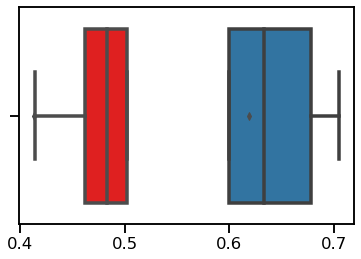

In [11]:
import seaborn as sns

ax = sns.boxplot(x=cv_res['test_accuracy'])
sns.boxplot(x=cv_res['test_balanced_accuracy'], color='red')

Balanced accuracy is significantly lower than the accuracy score.